In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.layers import Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

import math

In [86]:
# local directory (for vscode)
image_path_train = 'mood-images-large/train'
image_path_test = 'mood-images-large/test'

# drive folder (for google colab)
# from google.colab import drive
# drive.mount('/content/drive')
# image_set_path = '/content/drive/My Drive/dataset/mood-images'

In [123]:
base_model = MobileNet(input_shape=(224,224,3), include_top=False)

In [124]:
for layer in base_model.layers:
    layer.trainable = False

In [135]:
x = base_model.output
x = Flatten()(x)
x = Dense(7)(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)
# x = Dropout(0.5)(x)

In [136]:
model = Model(inputs=base_model.input, outputs=x)

In [137]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)
train_data = train_datagen.flow_from_directory(
    directory=image_path_train,
    target_size=(224,224),
    batch_size=batch_size,
)
train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [138]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(
    directory=image_path_test,
    target_size=(224,224),
    batch_size=batch_size,
)

Found 7178 images belonging to 7 classes.


In [139]:
es = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode='auto',
)

mc = ModelCheckpoint(
    filepath='mood_model.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto'
)

callbacks = [es,mc]

In [140]:
print('Train total samples:', train_data.n)
print('Validation total samples:', val_data.n)

steps_per_epoch = math.ceil((train_data.n // batch_size) * 0.02)
print('Steps per epoch:', steps_per_epoch)

val_steps = math.ceil((val_data.n // batch_size) * 0.05)
print('Validation steps:', val_steps)

Train total samples: 28709
Validation total samples: 7178
Steps per epoch: 18
Validation steps: 12


In [141]:
epochs = 30

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist = model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_data,
    validation_steps=val_steps,
    callbacks=callbacks,
)

Epoch 1/30


c:\Users\rdlor\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.2113 - loss: 2.1541
Epoch 1: val_accuracy improved from -inf to 0.32552, saving model to mood_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 899ms/step - accuracy: 0.2130 - loss: 2.1476 - val_accuracy: 0.3255 - val_loss: 3.1201
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.3469 - loss: 1.7486
Epoch 2: val_accuracy improved from 0.32552 to 0.37240, saving model to mood_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 796ms/step - accuracy: 0.3479 - loss: 1.7472 - val_accuracy: 0.3724 - val_loss: 2.1287
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.4158 - loss: 1.6055
Epoch 3: val_accuracy did not improve from 0.37240
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 769ms/step - accuracy: 0.4166 - loss: 1.6051 - val_accuracy: 0.3385 - val_loss: 1.9077
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.4247 - loss: 1.5479
Epoch 4: val_accuracy improved from 0.37240 to 0.37760, saving model to mood_model.kera

c:\Users\rdlor\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.4541 - loss: 1.3636
Epoch 20: val_accuracy did not improve from 0.52083
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 723ms/step - accuracy: 0.4552 - loss: 1.3645 - val_accuracy: 0.5078 - val_loss: 1.3829
Epoch 21/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.5056 - loss: 1.3844
Epoch 21: val_accuracy did not improve from 0.52083
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 729ms/step - accuracy: 0.5057 - loss: 1.3838 - val_accuracy: 0.4922 - val_loss: 1.4360
Epoch 21: early stopping


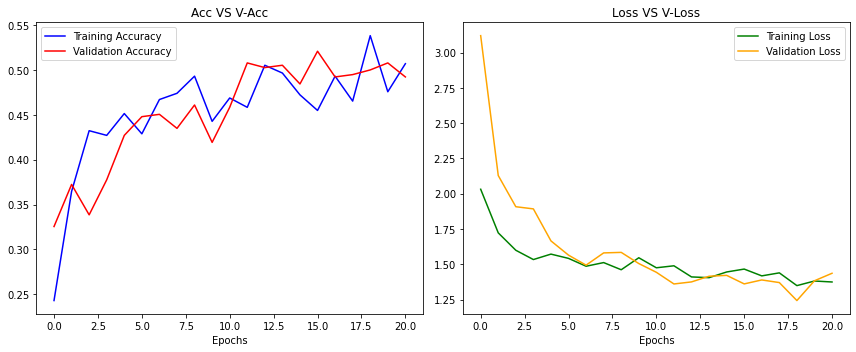

In [147]:
h = hist.history

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'] , c='red', label='Validation Accuracy')
plt.title('Acc VS V-Acc')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(h['loss'], c='green', label='Training Loss')
plt.plot(h['val_loss'] , c="orange", label='Validation Loss')
plt.title('Loss VS V-Loss')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()